In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from ydata_profiling import ProfileReport

# Cargar archivos de absorción
file_suffix_A = ['AChMN', 'AGoMG', 'AMiMG', 'AOxMM', 'AIlly']

for file_name in file_suffix_A:
    file_path = f'Data/{file_name}.txt'
    try:
        file = pd.read_csv(file_path, engine='python', sep='\t', skiprows=8)
        file.iloc[:, 1] = pd.to_numeric(file['A'], errors='coerce')
        globals()[file_name] = file
        print(f"{file_name}     CARGADO")
    except FileNotFoundError:
        print(f"No se encontró el archivo {file_name}.txt")

    for porce in ['05', '20', '50']:
        try:
            file_path = f'Data/{file_name}{porce}.txt'
            file = pd.read_csv(file_path, engine='python', sep='\t', skiprows=8)
            file.iloc[:, 1] = pd.to_numeric(file['A'], errors='coerce')
            globals()[file_name + porce] = file
            print(f"{file_name+porce}     CARGADO")
        except FileNotFoundError:
            print(f"No se encontró el archivo {file_name+porce}.txt")


/home/jabg20/.pyenv/versions/3.11.8/envs/ydata-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AChMN     CARGADO
AChMN05     CARGADO
AChMN20     CARGADO
AChMN50     CARGADO
AGoMG     CARGADO
AGoMG05     CARGADO
AGoMG20     CARGADO
AGoMG50     CARGADO
AMiMG     CARGADO
AMiMG05     CARGADO
AMiMG20     CARGADO
AMiMG50     CARGADO
AOxMM     CARGADO
AOxMM05     CARGADO
AOxMM20     CARGADO
AOxMM50     CARGADO
AIlly     CARGADO
No se encontró el archivo AIlly05.txt
No se encontró el archivo AIlly20.txt
No se encontró el archivo AIlly50.txt


## Gráficas

### Gráfica de absorción y transmitancia de:

- ILLY MM  
- CHIAPAS MN  
- MIXTECA OAXAQUEÑA MG  
- OAXACA MM  
- GUERRERO MG


In [4]:
# Cargar archivos de transmitancia
file_suffix_T = ['TChMN', 'TGoMG', 'TMiMG', 'TOxMM', 'TIlly']

for file_name in file_suffix_T:
    file_path = f'Data/{file_name}.txt'
    try:
        file = pd.read_csv(file_path, engine='python', sep='\t', skiprows=8)
        file.iloc[:, 1] = pd.to_numeric(file['%T'], errors='coerce')
        globals()[file_name] = file
        print(f"{file_name}     CARGADO")
    except FileNotFoundError:
        print(f"No se encontró el archivo {file_name}.txt")

    for porce in ['05', '20', '50']:
        try:
            file_path = f'Data/{file_name}{porce}.txt'
            file = pd.read_csv(file_path, engine='python', sep='\t', skiprows=8)
            file.iloc[:, 1] = pd.to_numeric(file['%T'], errors='coerce')
            globals()[file_name + porce] = file
            print(f"{file_name+porce}     CARGADO")
        except FileNotFoundError:
            print(f"No se encontró el archivo {file_name+porce}.txt")


TChMN     CARGADO
TChMN05     CARGADO
TChMN20     CARGADO
TChMN50     CARGADO
TGoMG     CARGADO
TGoMG05     CARGADO
TGoMG20     CARGADO
TGoMG50     CARGADO
TMiMG     CARGADO
TMiMG05     CARGADO
TMiMG20     CARGADO
TMiMG50     CARGADO
TOxMM     CARGADO
TOxMM05     CARGADO
TOxMM20     CARGADO
TOxMM50     CARGADO
TIlly     CARGADO
No se encontró el archivo TIlly05.txt
No se encontró el archivo TIlly20.txt
No se encontró el archivo TIlly50.txt


In [5]:
AIlly.head()


,nm,A
0,200.0,NaN
1,200.5,NaN
2,201.0,NaN
3,201.5,NaN
4,202.0,NaN


In [6]:
TIlly.head()

,nm,%T
0,390.0,NaN
1,391.0,NaN
2,392.0,NaN
3,393.0,NaN
4,394.0,31.101


# Graficar absorbancia y transmitancia con colores variables (azul -> violeta)

/tmp/ipykernel_165419/2258441393.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_A = cm.get_cmap('tab10', len(file_suffix_A))
/tmp/ipykernel_165419/2258441393.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_T = cm.get_cmap('Set1', len(file_suffix_T))


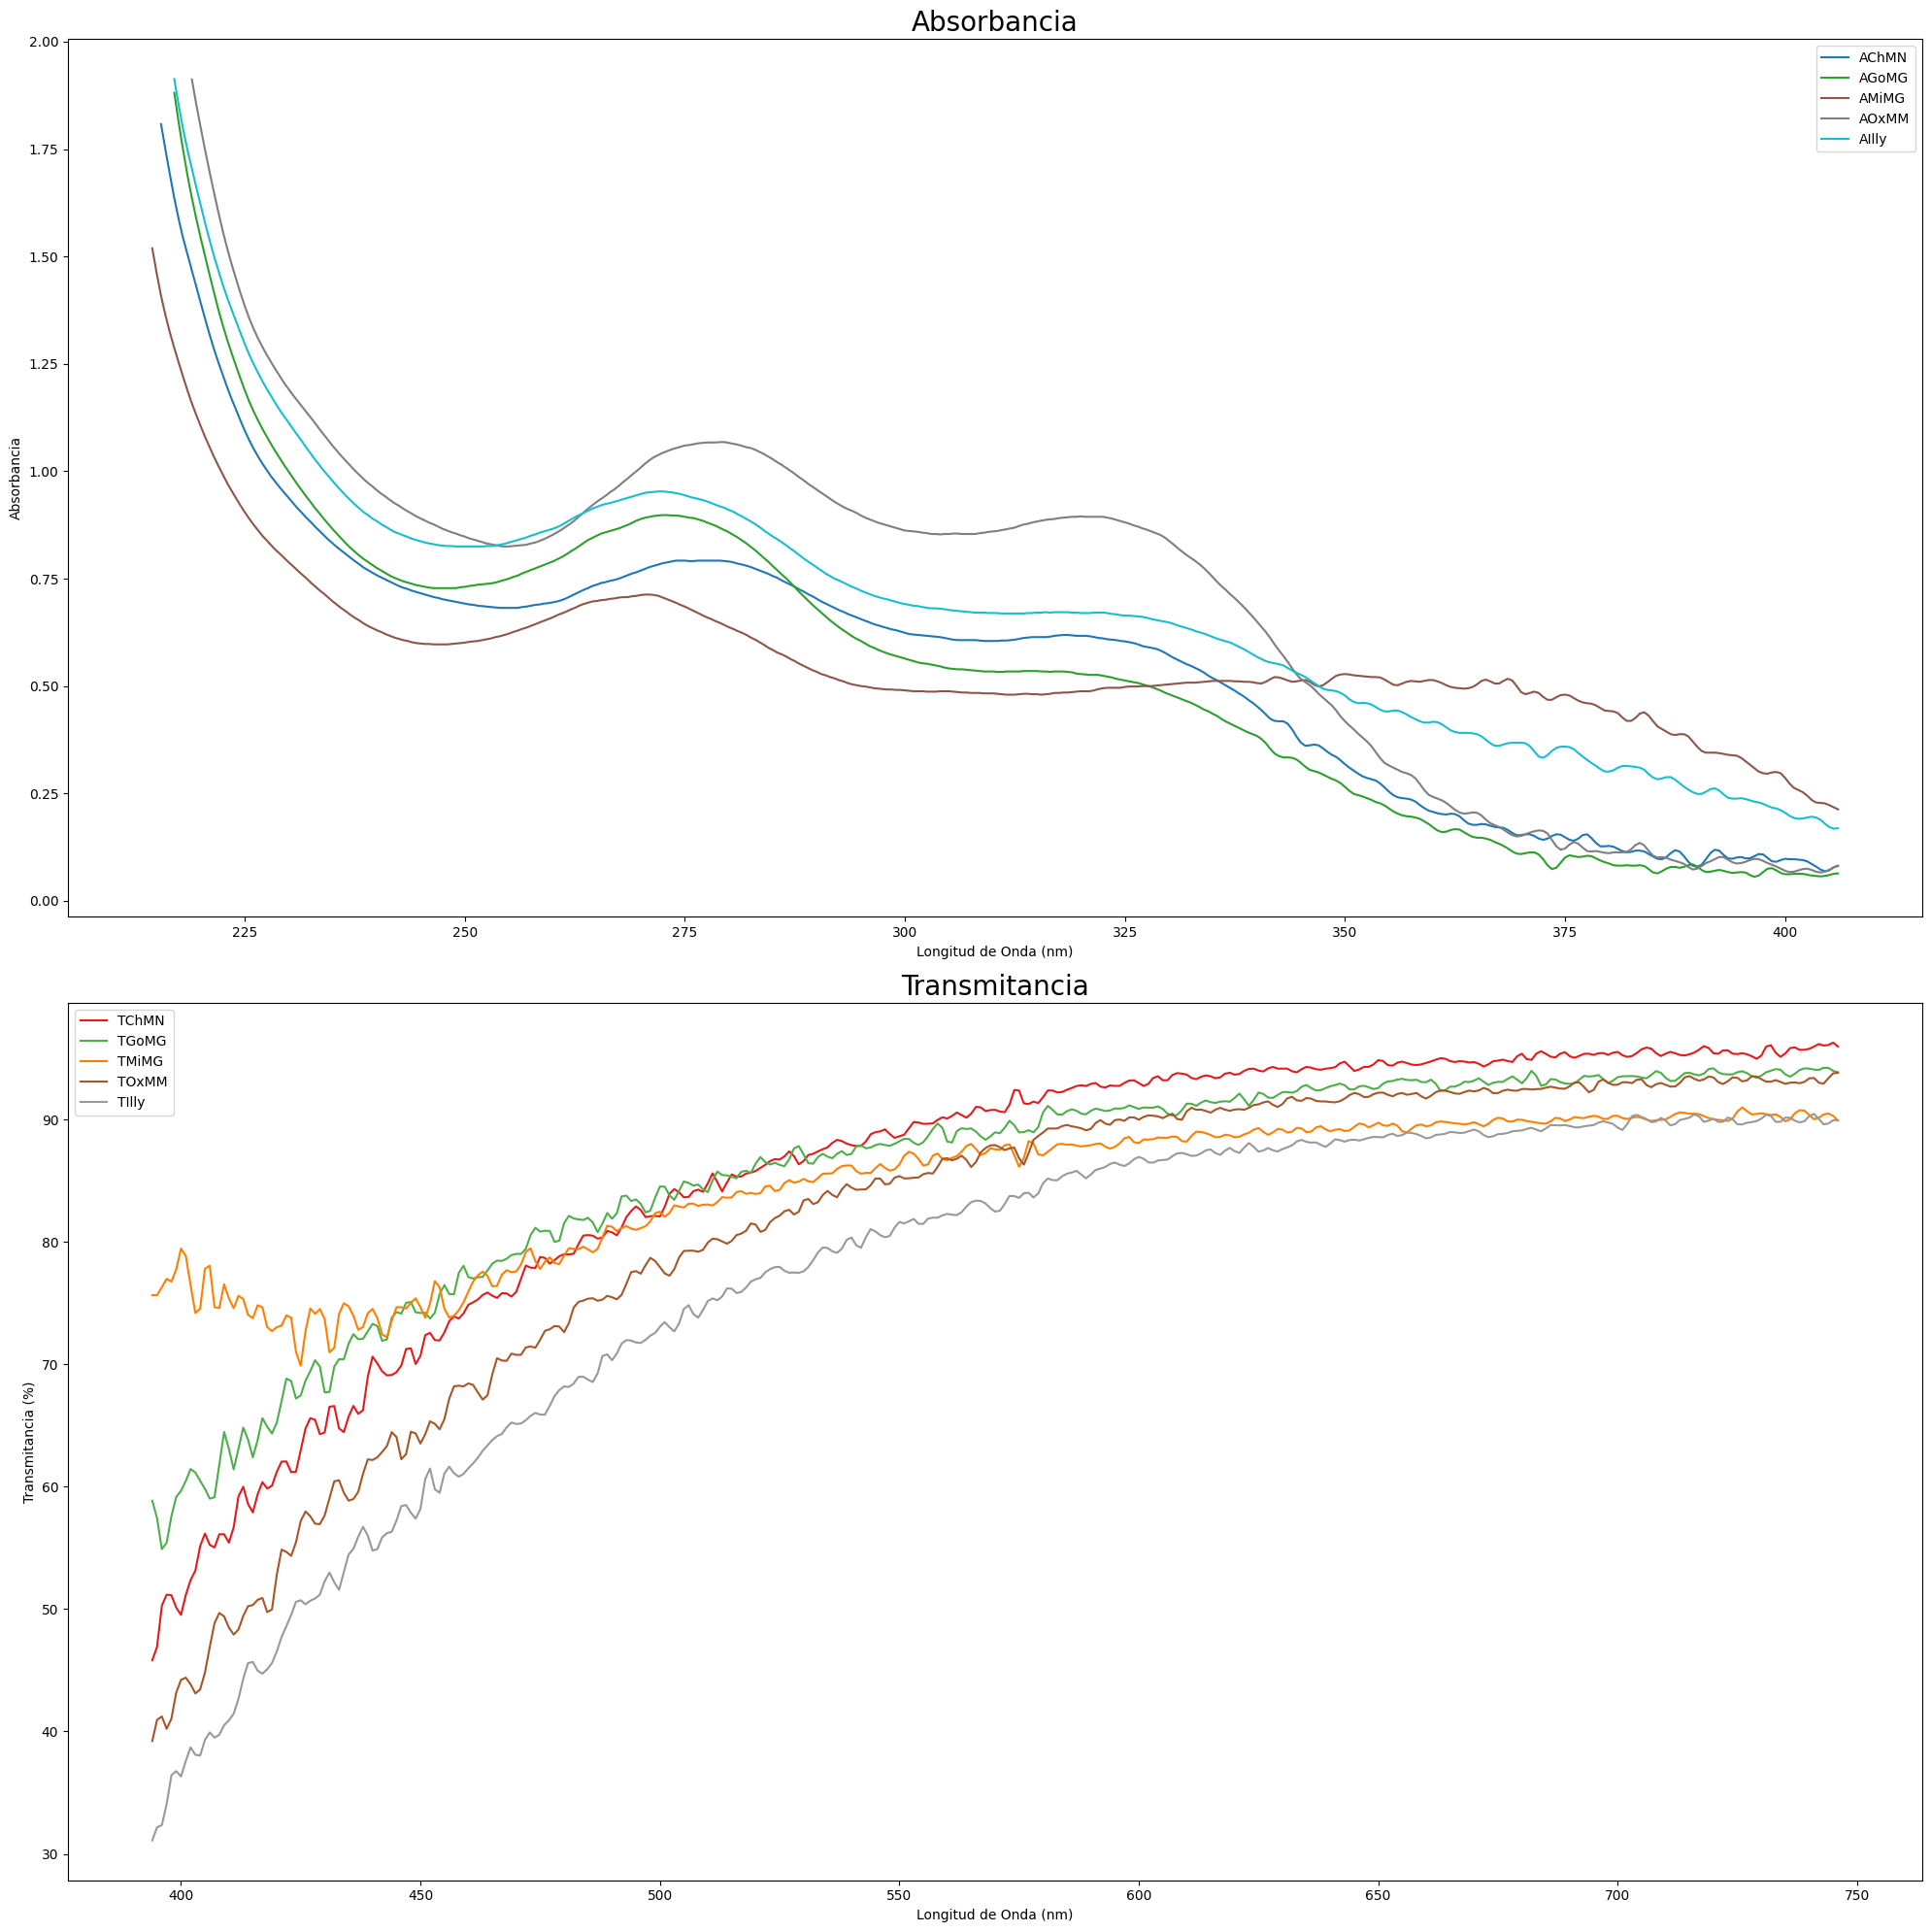

In [12]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

cmap_A = cm.get_cmap('tab10', len(file_suffix_A))
cmap_T = cm.get_cmap('Set1', len(file_suffix_T))

# Absorbancia
for i, name in enumerate(file_suffix_A):
    df = globals()[name]
    ax1.plot(df['nm'], df['A'], color=cmap_A(i), label=name)

ax1.set_title("Absorbancia", fontsize=20)
ax1.set_xlabel('Longitud de Onda (nm)')
ax1.set_ylabel('Absorbancia')
ax1.legend(loc='upper right')

# Transmitancia
for i, name in enumerate(file_suffix_T):
    df = globals()[name]
    ax2.plot(df['nm'], df['%T'], color=cmap_T(i), label=name)

ax2.set_title("Transmitancia", fontsize=20)
ax2.set_xlabel('Longitud de Onda (nm)')
ax2.set_ylabel('Transmitancia (%)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()
